#### Import of Libraries

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [200]:
df = pd.read_csv('datasets/phishing/phishingData.csv')
#df_cd = pd.merge(df["at1"],df["height"], how='inner',left_on=None)
#df.to_csv('page_blocks_edited.csv', index=False)
df=df.drop(columns=["id"])

In [201]:
df.head(5)

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Class
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [202]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Class              1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB
Number of duplicated rows is:  629
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

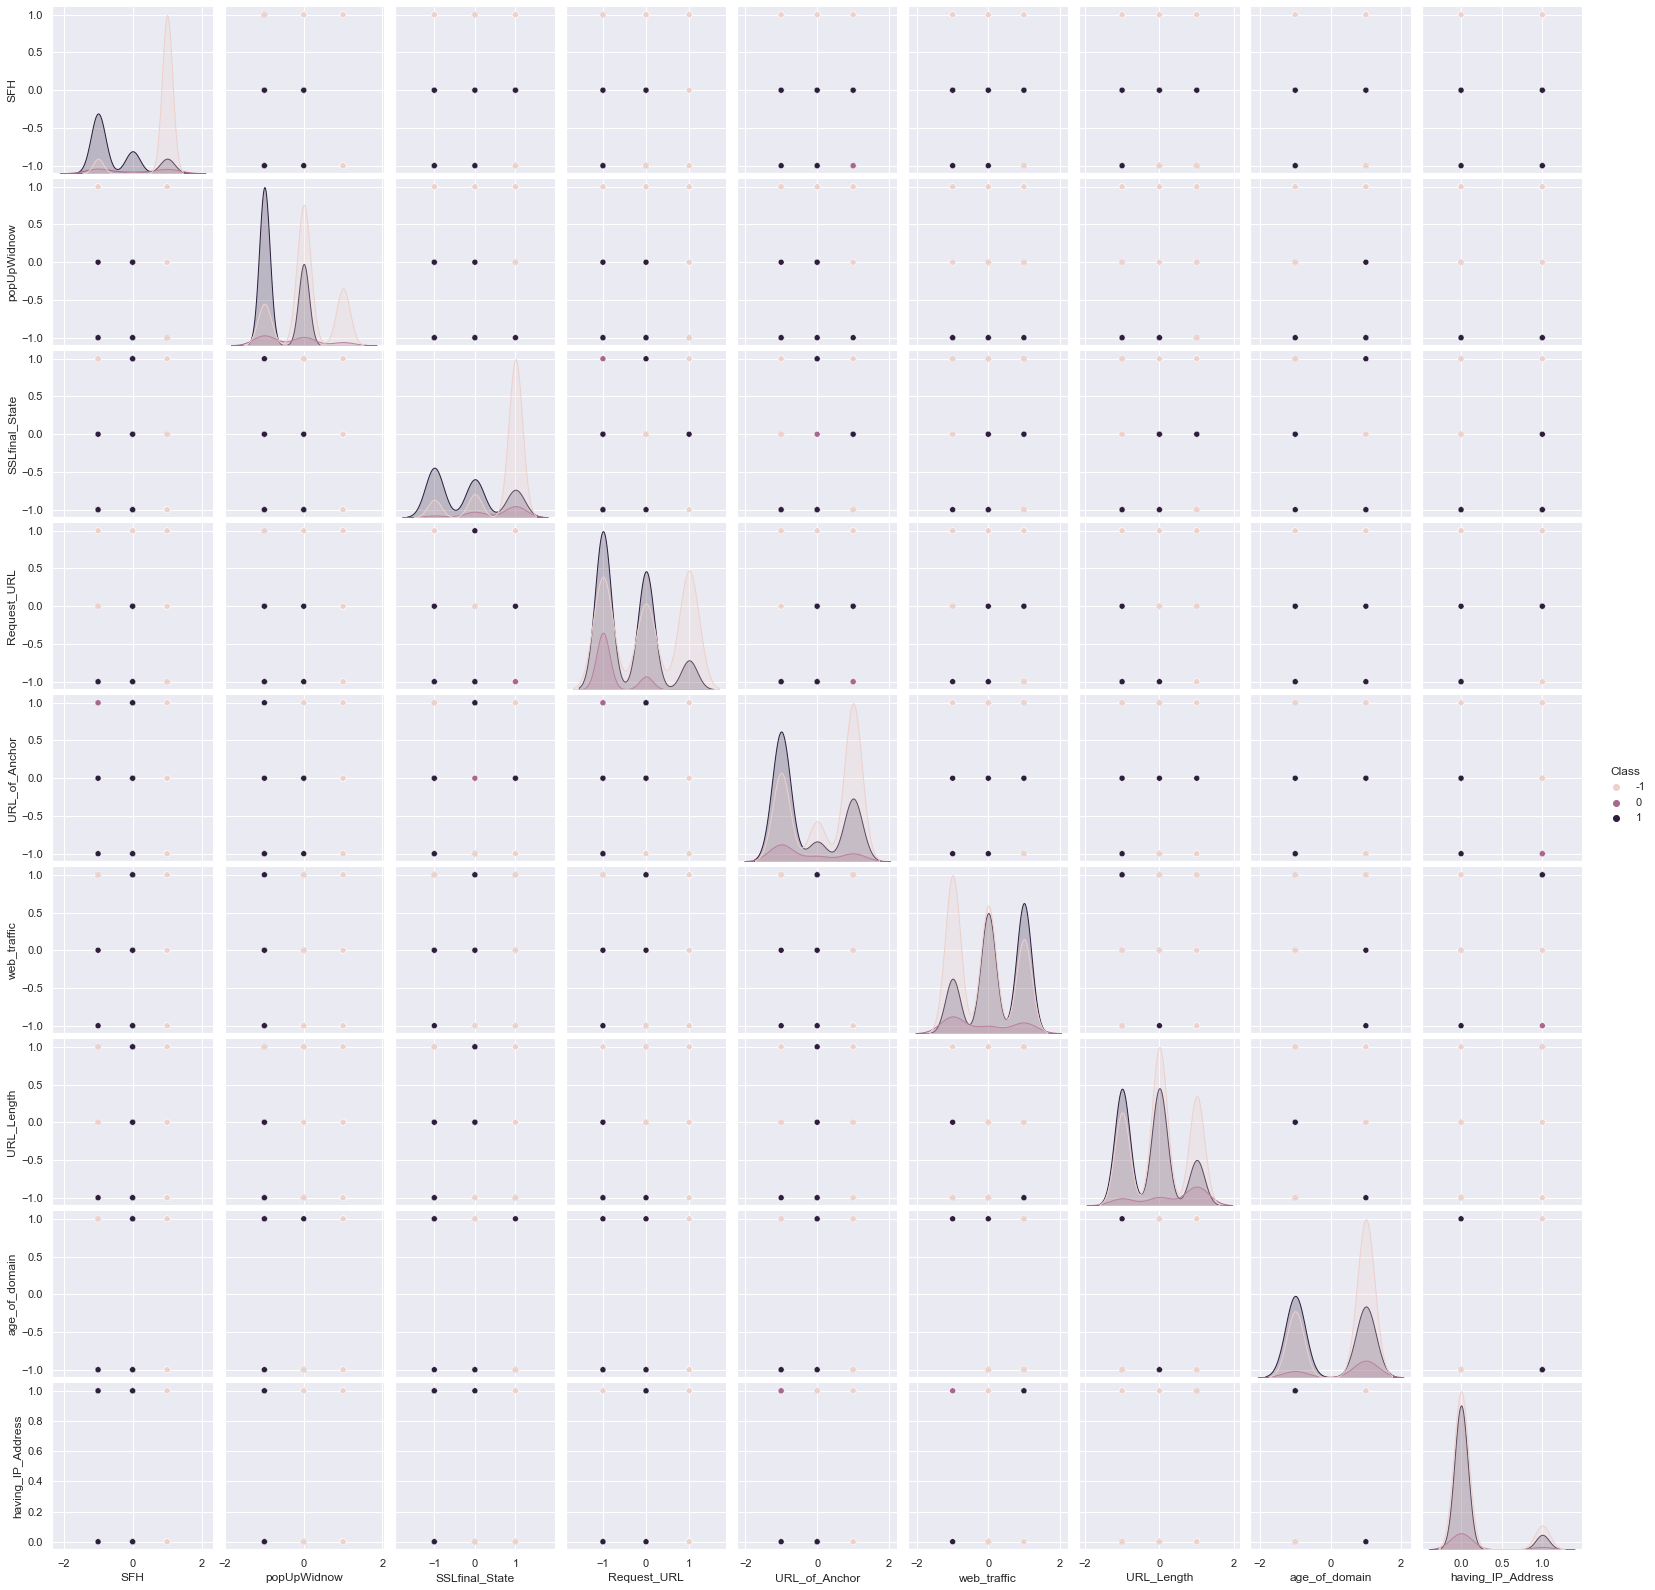

In [203]:
sns.pairplot(df, hue='Class')
plt.show()

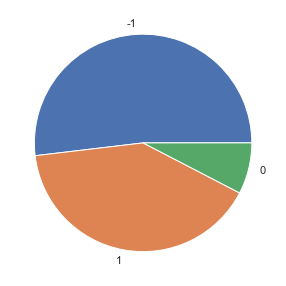

In [204]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [205]:
X = df.drop(columns=['Class'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SFH,1353.0,0.237990,0.916389,-1.0,-1.0,1.0,1.0,1.0
popUpWidnow,1353.0,-0.258684,0.679072,-1.0,-1.0,0.0,0.0,1.0
SSLfinal_State,1353.0,0.327421,0.822193,-1.0,0.0,1.0,1.0,1.0
Request_URL,1353.0,-0.223208,0.799682,-1.0,-1.0,0.0,0.0,1.0
URL_of_Anchor,1353.0,-0.025129,0.936262,-1.0,-1.0,0.0,1.0,1.0
web_traffic,1353.0,0.000000,0.806776,-1.0,-1.0,0.0,1.0,1.0
URL_Length,1353.0,-0.053215,0.762552,-1.0,-1.0,0.0,1.0,1.0
age_of_domain,1353.0,0.219512,0.975970,-1.0,-1.0,1.0,1.0,1.0
having_IP_Address,1353.0,0.114560,0.318608,0.0,0.0,0.0,0.0,1.0


#### Standardize the Data

In [206]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SFH,1353.0,-3.150966e-17,1.00037,-1.351443,-1.351443,0.831843,0.831843,0.831843
popUpWidnow,1353.0,-1.312902e-18,1.00037,-1.092063,-1.092063,0.381079,0.381079,1.854220
SSLfinal_State,1353.0,-2.100644e-17,1.00037,-1.615086,-0.398376,0.818334,0.818334,0.818334
Request_URL,1353.0,-6.827092e-17,1.00037,-0.971736,-0.971736,0.279224,0.279224,1.530184
URL_of_Anchor,1353.0,-7.089673e-17,1.00037,-1.041622,-1.041622,0.026850,1.095322,1.095322
web_traffic,1353.0,-2.625805e-18,1.00037,-1.239960,-1.239960,0.000000,1.239960,1.239960
URL_Length,1353.0,2.625805e-17,1.00037,-1.242060,-1.242060,0.069811,1.381682,1.381682
age_of_domain,1353.0,0.000000e+00,1.00037,-1.250000,-1.250000,0.800000,0.800000,0.800000
having_IP_Address,1353.0,4.135642e-17,1.00037,-0.359698,-0.359698,-0.359698,-0.359698,2.780114


#### Observations and Variables

In [207]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

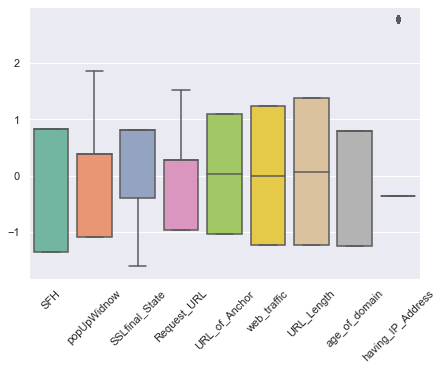

In [208]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

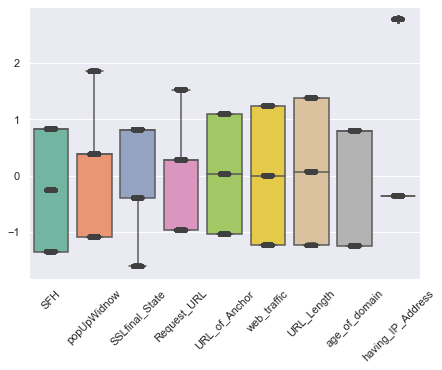

In [209]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

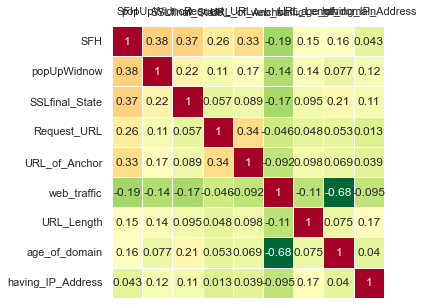

In [210]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [211]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [9] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [8] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [212]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.228240,-0.475914,1.022934,-0.594784,-1.409071,-1.598397,0.009887,-0.884737
1,-1.105828,-1.766267,2.237907,2.698229,0.594779,0.102948,0.038854,-0.599755
2,-0.421937,-0.808138,-1.124980,-0.532962,0.564464,-0.401668,-0.589339,-1.436296
3,0.785520,-0.816078,1.201871,-0.866694,-1.433274,-0.339141,-0.244747,-0.437260
4,-0.967292,-1.468341,-0.636747,-0.660529,0.723056,-0.877746,0.815483,0.956406
...,...,...,...,...,...,...,...,...
1348,-1.381950,-2.461882,-0.420839,1.025906,-0.522755,0.580615,0.011272,-0.270441
1349,-0.186813,-1.011972,0.155458,-0.413873,-0.085903,-0.228209,-1.153872,1.322562
1350,-2.436708,-0.422667,-0.005286,-0.306702,0.359822,1.694904,-0.101960,0.100234
1351,0.361493,-0.380786,-0.796978,-0.984398,0.807412,-0.034273,-0.210225,0.693771


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'8 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (25.9% expl.var)', ylabel='PC2 (16.1% expl.var)'>)

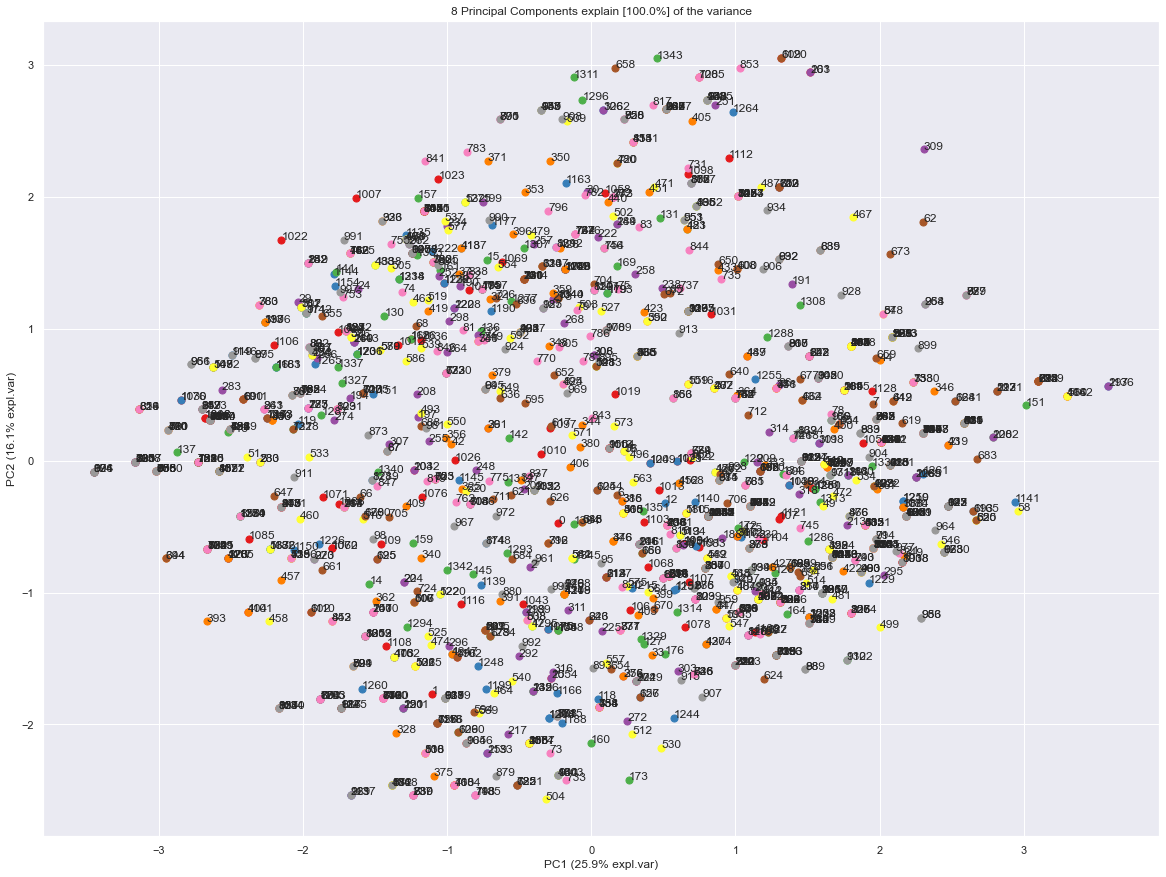

In [213]:
model.scatter(label=True, legend=False)

Eigenvectors

In [214]:
A = out['loadings'].T

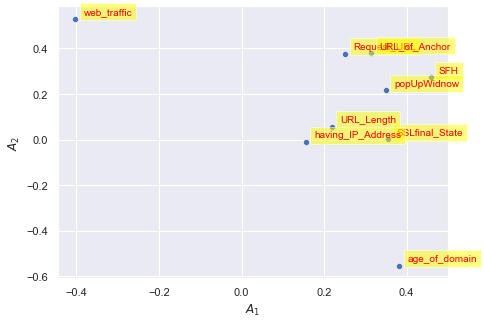

In [215]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

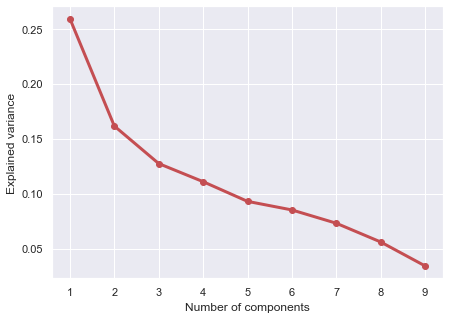

In [216]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

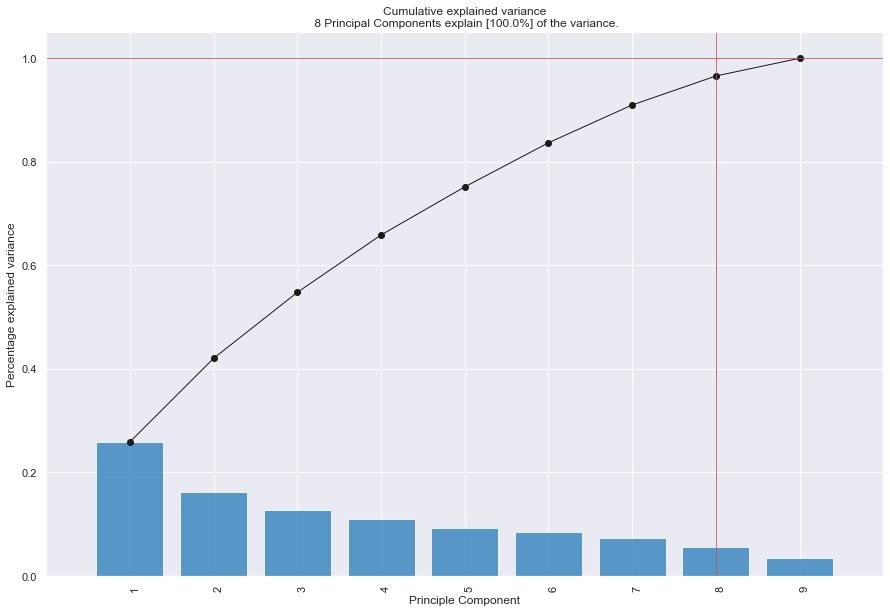

<Figure size 504x360 with 0 Axes>

In [217]:
model.plot();